This notebook attempts to analyze which dimensions may encode **Singular** and **Plural** information for **NOUN**, **Adj** and **Noun and Adj**. 



# result

Dimension which have largest correlation with number: **singular** and **plural**




NOUN :  310 > 81 > 288 > 250 > 507 > 278 > 285 > 54 > 172 > 25

ADJ :  310 > 54 > 192 > 384 > 274 > 84 > 56 >  318 > 285 > 25

NOUN+ADJ: 54 > 310 > 56 > 285 > 84 > 81 > 384 > 311 > 318 > 474

Commun dimension  :  310, 54, 285








Comprared with Adj, Noun have biggest correlation with nb

| dimension | Noun correlation with nb | Adj correlation with nb| Noun+Adj with nb
| --- | --- | --- | --- | 
| 310 | 0.480787 | 0.410988 | 0.217724 |
| 54  | 0.306434 | 0.399206 | 0.248117 |
| 285 | 0.306895 | 0.316130 | 0.199670 |




In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Load data

In [ ]:
all_n_we = pd.read_csv('../Data/FlauBERT_WE/all_nouns_we.csv', index_col=0).drop(columns=["gender"])

# Normalization
for i in range(512):
    values, copy = list(all_n_we[str(i)]), list(all_n_we[str(i)])
    copy.sort()
    min_, max_ = copy[0], copy[len(copy)-1]
    all_n_we[str(i)] = [val / (max_ - min_) for val in values]



sg_n_we = all_n_we[all_n_we["number"] == "singular"]
pl_n_we = all_n_we[all_n_we["number"] == "plural"]

In [ ]:
# Here we selected only 4638 singular noun and 4638 plural noun, because the size of singular noun has twice as many as plural noun and if we don't balance them,  
# the result  below will be affected


all_n_we=pd.concat([sg_n_we[:4638], pl_n_we[:4638]])

In [ ]:
all_n_we

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,number
Word,,,,,,,,,,,,,,,,,,,,,
abaisse,0.220459,-0.185174,0.045101,0.178714,-0.108041,-0.185223,-0.038133,-0.035881,0.206875,0.197348,...,0.185762,-0.084412,0.023871,-0.052849,-0.267209,-0.440458,-0.227911,-0.021792,-0.070034,singular
abandonnée,0.186562,0.062755,0.030736,-0.143579,0.006462,-0.319613,-0.188934,-0.008268,-0.178685,-0.003653,...,0.023211,-0.053564,-0.200903,-0.081681,-0.337104,-0.226090,-0.244174,0.193163,-0.026614,singular
abattue,0.260729,0.044799,0.100262,-0.003613,-0.014958,-0.248013,-0.062373,0.089560,0.103828,0.065361,...,0.038298,-0.067715,-0.088245,-0.185171,-0.425530,-0.397078,-0.164545,-0.047245,-0.010448,singular
abbaye,0.205826,-0.215930,0.101201,0.006262,0.232492,-0.271341,-0.203044,-0.136419,-0.081058,0.065823,...,-0.279662,0.199704,0.146500,-0.078226,-0.315869,-0.329190,0.158065,-0.134252,-0.219602,singular
abdominale,0.211081,-0.013678,0.240263,0.032897,0.017872,-0.184198,-0.119463,-0.360880,0.434171,0.266727,...,0.266714,-0.035179,-0.078115,-0.001525,-0.120634,-0.262442,-0.000265,0.190060,-0.191832,singular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
événements,-0.059005,-0.037699,0.067933,0.216258,0.186763,-0.154193,-0.012498,0.108529,0.028374,-0.045180,...,0.049204,-0.015031,-0.165675,0.123249,-0.085762,-0.165766,-0.297200,0.050490,0.042883,plural
évêques,-0.015915,-0.219548,-0.061858,0.070170,0.108059,-0.037888,-0.104214,0.093217,0.180943,-0.001320,...,-0.049661,-0.027990,-0.005807,-0.023432,-0.100197,-0.229627,-0.097213,-0.097342,-0.038175,plural
êtres,0.170110,-0.209239,0.310894,0.106415,0.180311,-0.158953,0.129373,-0.008534,0.085612,0.043121,...,-0.073052,-0.135915,0.035351,-0.048647,0.001023,-0.178523,-0.093425,0.006703,-0.049017,plural


In [ ]:
dim_indices = range(512)
avg_values_sg = [sg_n_we[str(i)].mean() for i in dim_indices]
avg_values_pl = [pl_n_we[str(i)].mean() for i in dim_indices]
d = [abs(s-p) for s,p in zip(avg_values_sg, avg_values_pl)]
diff={d[i]:i for i in dim_indices}

sg_avg = pd.DataFrame([avg_values_sg], index=["sg_avg"], columns=dim_indices)
pl_avg = pd.DataFrame([avg_values_pl], index=["pl_avg"], columns=dim_indices)


In [ ]:
sg_avg 

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
sg_avg,0.131011,-0.104751,0.030737,-0.032182,0.049759,-0.099838,-0.095314,-0.004845,0.065201,0.049401,...,-0.050651,0.038148,0.026703,-0.075395,-0.021503,-0.155497,-0.190517,-0.151398,0.041731,-0.09811


In [ ]:
pl_avg 

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
pl_avg,0.103023,-0.070655,0.025258,0.020364,0.06378,-0.162463,-0.087478,-0.030377,0.009936,0.018466,...,-0.066425,0.027184,0.049671,-0.059528,-0.057229,-0.103857,-0.197183,-0.156819,0.04267,-0.052443


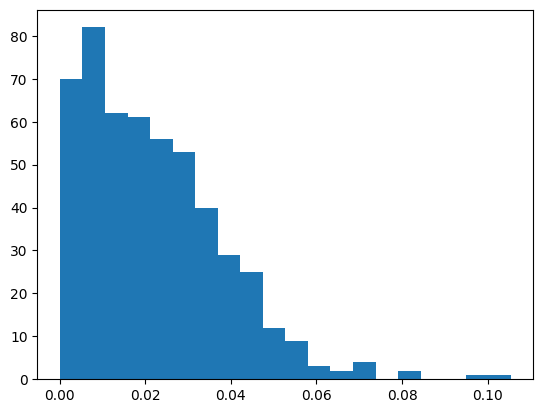

In [ ]:
from matplotlib import pyplot as plt 
plt.hist(d, bins=20)
plt.show()

Select 10 dimensions which have the largest average value

In [ ]:
d.sort(reverse=True)
n = 10
topn = []
for v in d[:n]:
    print(diff[v], v)
    topn.append(diff[v])

print(topn)

310 0.10540746446023452
54 0.09712453130859483
288 0.08050521862389197
285 0.07954860014414282
81 0.07375025422192646
278 0.0736181594627135
250 0.07245694155216087
172 0.07046282223869141
384 0.0672283258262153
495 0.06406592256143762
[310, 54, 288, 285, 81, 278, 250, 172, 384, 495]


Select 10 dimensions which have the smallest average value

In [ ]:
n = 10
botn = []
for v in d[-n:]:
    print(diff[v], v)
    botn.append(diff[v])

print(botn)

322 0.0007717250019160498
152 0.0007158655570728562
118 0.0004908815104918002
14 0.00046150788793621056
433 0.00025035964588224213
275 0.00024265340677810665
70 0.00014834390780152362
388 0.00012527237409584724
100 0.00010461308206143223
323 8.945390735259906e-05
[322, 152, 118, 14, 433, 275, 70, 388, 100, 323]


## Dimensions with intra class std

In [ ]:
# dimensions with intra class lowest std for singular noun
sg_n_we.loc[:,:'511'].std().sort_values()[:10]



287    0.101069
83     0.102966
314    0.103426
69     0.103808
365    0.104002
209    0.104181
441    0.104558
408    0.105472
496    0.106305
12     0.106947
dtype: float64

In [ ]:

# dimensions with intra class highest std for singular noun
sg_n_we.loc[:,:'511'].std().sort_values()[:-10:-1]



202    0.148658
347    0.146748
429    0.145427
480    0.144419
476    0.144175
251    0.144012
100    0.143955
145    0.143115
199    0.142929
dtype: float64

In [ ]:
# dimensions with intra class lowest std for plural noun

pl_n_we.loc[:,:'511'].std().sort_values()[:10]



25     0.094950
365    0.099794
209    0.100401
12     0.100881
441    0.101316
338    0.102509
287    0.102830
408    0.103095
83     0.103177
69     0.104031
dtype: float64

In [ ]:
# dimensions with intra class highest std for plural noun
pl_n_we.loc[:,:'511'].std().sort_values()[:-10:-1]


476    0.144521
202    0.144005
135    0.142275
361    0.141891
258    0.141388
347    0.140966
426    0.140745
483    0.140622
486    0.140198
dtype: float64

# Dimension both in lowest intra class std for singular and plural: 83, 287, 69,365,209,441,408,12




# Correlation

# Correlation between dimentions with largest difference of sg_avg and pl_avg and Number

Test the correlation of "nb" with 10 dimensions of average which have the largest difference: [310, 54, 288, 285, 81, 278, 250, 172, 384, 495]

In [ ]:
all_n_we["number"] = all_n_we["number"].apply(lambda x: 1 if x == "singular" else 0)
number_corr_df = pd.DataFrame(columns=["correlation number"])
number_list = []

for i in range(512):
    number_list.append(all_n_we.loc[:,[str(i), 'number']].corr().iloc[0][-1])

number_corr_df["correlation number"] = number_list
number_corr_df["sign"] = np.sign(number_corr_df["correlation number"])
number_corr_df["abs"] = abs(number_corr_df["correlation number"])

# Dimensions having the highest abs correlation with number
number_corr_df.sort_values("abs")[-10:][::-1]

,correlation number,sign,abs
310,0.480787,1.0,0.480787
81,-0.347984,-1.0,0.347984
288,-0.346962,-1.0,0.346962
250,-0.318835,-1.0,0.318835
507,-0.312207,-1.0,0.312207
278,-0.307268,-1.0,0.307268
285,0.306895,1.0,0.306895
54,0.306434,1.0,0.306434
172,0.290268,1.0,0.290268
25,-0.283359,-1.0,0.283359


In [ ]:
# Dimensions having the highest abs correlation with number
number_corr_df.sort_values("abs")[:10][::-1]

,correlation number,sign,abs
459,0.001586,1.0,0.001586
469,-0.001558,-1.0,0.001558
358,-0.001282,-1.0,0.001282
40,0.001058,1.0,0.001058
76,0.000990,1.0,0.000990
460,-0.000854,-1.0,0.000854
417,0.000791,1.0,0.000791
382,0.000737,1.0,0.000737
202,0.000424,1.0,0.000424
346,0.000416,1.0,0.000416


# Hypothsis for Noun : 


The dimensions the dimensions with largest correlation with number: 310,  81, 288, 250, 507, 278, 285, 54, 172, 25 , may encode information about Singular and Plural Nouns. 

The dimensions both have lowest intra class std : 83, 287, 69,365,209,441,408,12, may encode information about Singular and Plural Nouns.

# See in dimensions

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

Smallest correlection with nb: 346, 202, 382, 417, 460

<Axes: xlabel='460', ylabel='Count'>

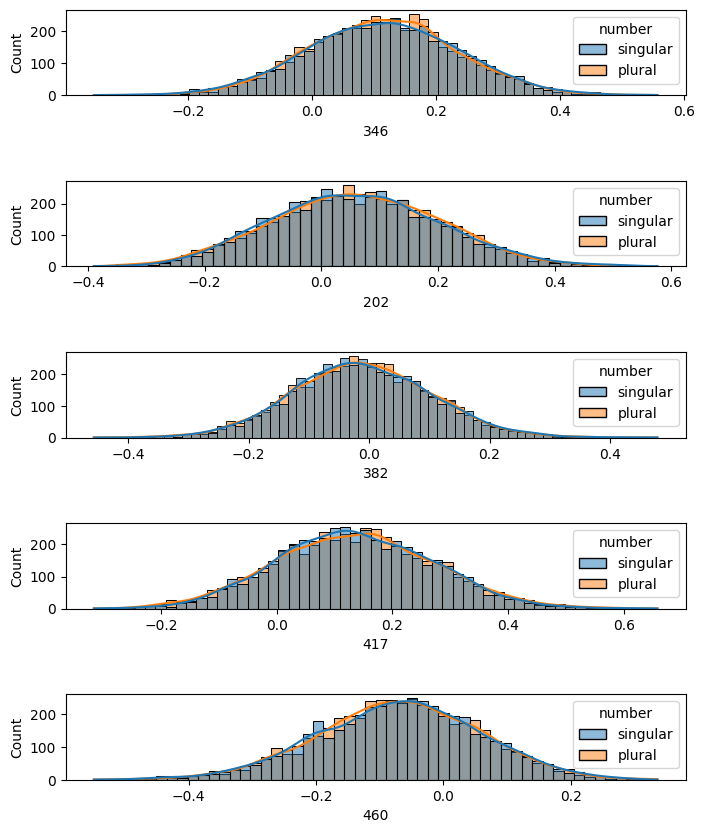

In [ ]:
# dimension 346, 202, 382, 417, 460
fig, axs = plt.subplots(5,1,figsize=(8,10))

fig.subplots_adjust(hspace=1)

sns.histplot(data=all_n_we, x="346", hue="number", kde=True, ax=axs[0])
sns.histplot(data=all_n_we, x="202", hue="number", kde=True, ax=axs[1])
sns.histplot(data=all_n_we, x="382", hue="number", kde=True, ax=axs[2])
sns.histplot(data=all_n_we, x="417", hue="number", kde=True, ax=axs[3])
sns.histplot(data=all_n_we, x="460", hue="number", kde=True, ax=axs[4])

Largest correlection with nb: 310, 81, 288, 250, 507, 278, 285, 54, 172, 25 

<Axes: xlabel='507', ylabel='Count'>

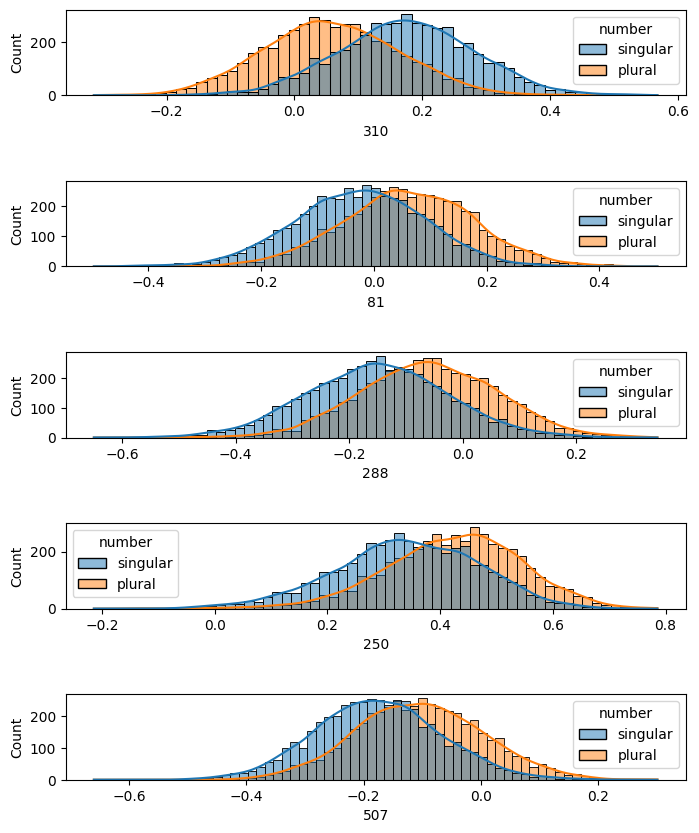

In [ ]:
# dimension 310,81,288,250,507
fig, axs = plt.subplots(5,1,figsize=(8,10))

fig.subplots_adjust(hspace=1)

sns.histplot(data=all_n_we, x="310", hue="number", kde=True, ax=axs[0])
sns.histplot(data=all_n_we, x="81", hue="number", kde=True, ax=axs[1])
sns.histplot(data=all_n_we, x="288", hue="number", kde=True, ax=axs[2])
sns.histplot(data=all_n_we, x="250", hue="number", kde=True, ax=axs[3])
sns.histplot(data=all_n_we, x="507", hue="number", kde=True, ax=axs[4])

Dimension 54

In [ ]:
all_n_we.loc[:, '54'].sort_values()[-30:]


Word
gels             0.377849
médecine         0.379716
autrichien       0.380172
décédée          0.382294
men              0.382307
bagage           0.383374
sage-femme       0.385762
contractions     0.386327
captivité        0.387437
maladie          0.388415
réanimation      0.389830
installation     0.390549
symptômes        0.393864
plomberie        0.394108
prescription     0.401226
villa            0.403806
allemand         0.406959
stérilisation    0.408153
éjaculation      0.426616
mure             0.432105
antérieur        0.435300
chaudière        0.439773
posologie        0.441992
habilité         0.442082
érection         0.447479
grossesse        0.453064
anesthésie       0.458630
pulmonaire       0.472511
vente            0.474613
rééducation      0.482730
Name: 54, dtype: float64

In [ ]:
all_n_we.loc[:, '54'].sort_values()[:30]

Word
rondes           -0.471380
horizontales     -0.443286
parrains         -0.439016
coordonnateurs   -0.434822
équité           -0.430893
irrégularités    -0.421639
collusion        -0.418176
once             -0.417377
bannières        -0.412824
alliances        -0.408956
meurtrières      -0.404731
raccourcis       -0.399812
amusantes        -0.392200
partenariats     -0.391315
alertes          -0.391112
échelons         -0.387710
unes             -0.387655
autonomisation   -0.378541
entrevues        -0.377331
ronde            -0.375971
flèches          -0.370194
innovation       -0.369921
Canadiennes      -0.369014
employées        -0.368513
injustices       -0.365870
factions         -0.365210
créatifs         -0.365034
créatifs         -0.365034
Caraïbes         -0.364661
inégalités       -0.362606
Name: 54, dtype: float64

<Axes: xlabel='25', ylabel='Count'>

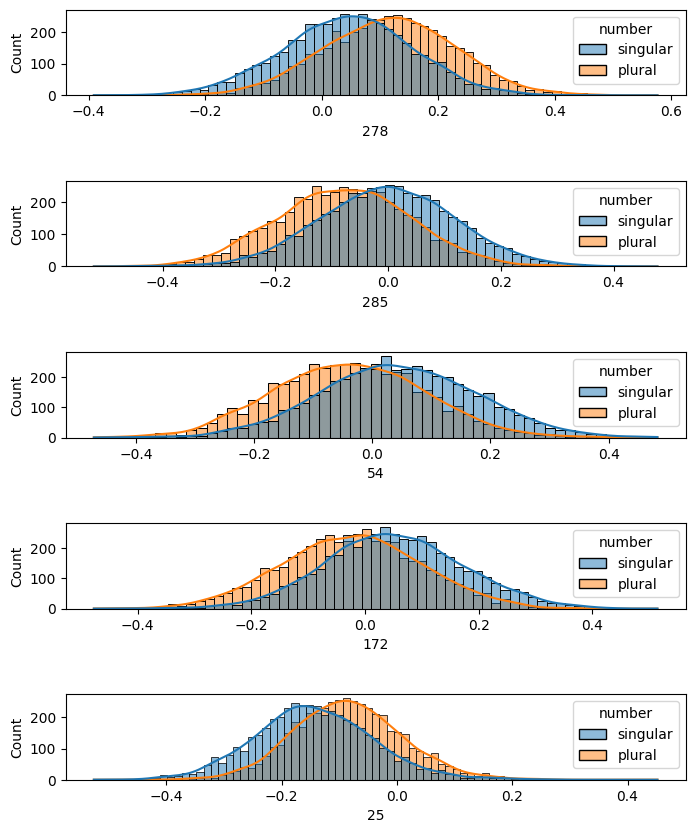

In [ ]:
# dimension 278, 285, 54, 172, 25 
fig, axs = plt.subplots(5,1,figsize=(8,10))

fig.subplots_adjust(hspace=1)

sns.histplot(data=all_n_we, x="278", hue="number", kde=True, ax=axs[0])
sns.histplot(data=all_n_we, x="285", hue="number", kde=True, ax=axs[1])
sns.histplot(data=all_n_we, x="54", hue="number", kde=True, ax=axs[2])
sns.histplot(data=all_n_we, x="172", hue="number", kde=True, ax=axs[3])
sns.histplot(data=all_n_we, x="25", hue="number", kde=True, ax=axs[4])

# Dimension with lowest intra class std for both singular and plural : [83,287,69,365,209,441,12,408]

<Axes: xlabel='365', ylabel='Count'>

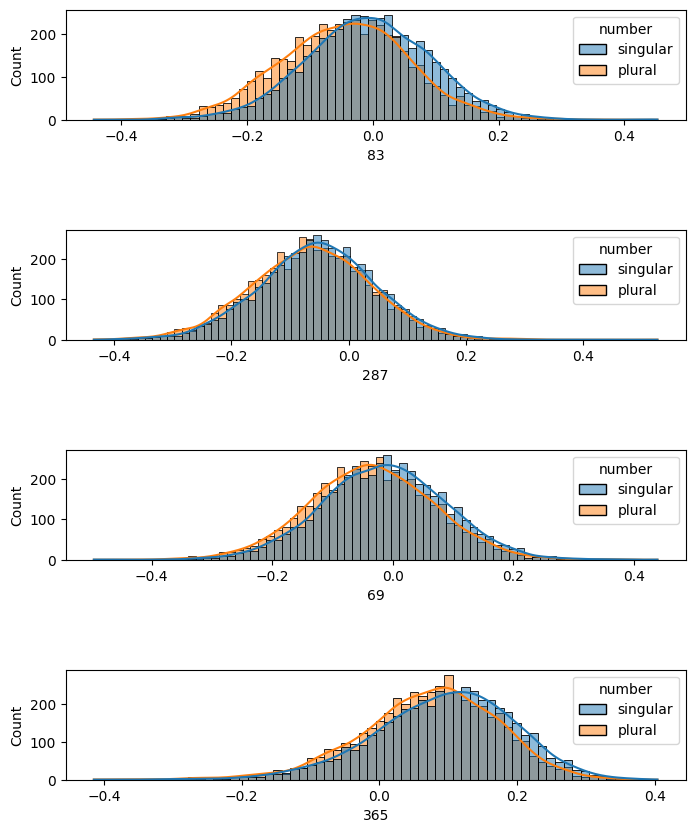

In [ ]:
# dimension 83, 287, 69, 365

fig, axs = plt.subplots(4,1,figsize=(8,10))
fig.subplots_adjust(hspace=1)
sns.histplot(data=all_n_we, x="83", hue="number", kde=True, ax=axs[0])
sns.histplot(data=all_n_we, x="287", hue="number", kde=True, ax=axs[1])
sns.histplot(data=all_n_we, x="69", hue="number", kde=True, ax=axs[2])
sns.histplot(data=all_n_we, x="365", hue="number", kde=True, ax=axs[3])



dimension 83

In [ ]:
all_n_we.loc[:, '83'].sort_values()[-30:]


Word
rente           0.261939
mates           0.264013
care            0.264354
Buffalo         0.266108
interception    0.267186
armé            0.267619
rentes          0.270497
cape            0.274297
bénéfices       0.274492
arménienne      0.274753
grâce           0.276083
gents           0.277190
fusillade       0.286875
homonymie       0.286973
lyonnaise       0.289576
astéroïdes      0.292105
dinars          0.294089
designs         0.295372
Canadienne      0.296077
suites          0.296423
survenue        0.297430
bris            0.307239
blessée         0.308404
fortune         0.327548
magnitude       0.344656
bers            0.348084
verges          0.373905
excentricité    0.419057
solvabilité     0.431110
albédo          0.452847
Name: 83, dtype: float64

In [ ]:
all_n_we.loc[:, '83'].sort_values()[:30]


Word
larves             -0.443921
deuxièmes          -0.398840
bébés              -0.389769
embryons           -0.387098
bisous             -0.379313
populistes         -0.361121
femelles           -0.360474
micro-organismes   -0.357413
stériles           -0.350231
prochaines         -0.343358
jeudis             -0.343082
augure             -0.342360
saillie            -0.339285
haricots           -0.336508
chenille           -0.330060
retenue            -0.328489
ponte              -0.327418
putain             -0.326854
capsules           -0.326524
déclenche          -0.326206
tops               -0.326135
chauffe            -0.324048
inutiles           -0.321172
minuscules         -0.320307
samedis            -0.319942
éliminatoires      -0.319776
porcs              -0.318827
mercredis          -0.317582
prochains          -0.315815
agace              -0.315718
Name: 83, dtype: float64

<Axes: xlabel='408', ylabel='Count'>

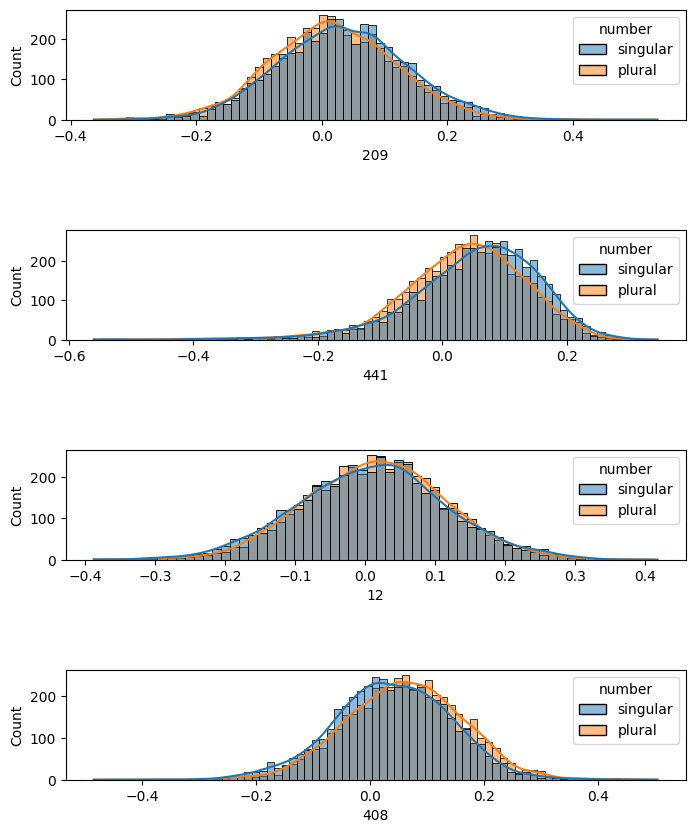

In [ ]:
# dimension 209,441,12, 408

fig, axs = plt.subplots(4,1,figsize=(8,10))
fig.subplots_adjust(hspace=1)
sns.histplot(data=all_n_we, x="209", hue="number", kde=True, ax=axs[0])
sns.histplot(data=all_n_we, x="441", hue="number", kde=True, ax=axs[1])
sns.histplot(data=all_n_we, x="12", hue="number", kde=True, ax=axs[2])
sns.histplot(data=all_n_we, x="408", hue="number", kde=True, ax=axs[3])

From the result above, it seems that the dimensions with largest correlation with number may encode information about Singular and Plural Nouns. 


The dimensions The dimensions both have lowest intra class std dont't encode information about Singular and Plural Nouns.

# ADJ

# Load data

In [ ]:
all_adj_we = pd.read_csv('../Data/FlauBERT_WE/all_adjectives_we.csv', index_col=0).drop(columns=["gender"])

# Normalization
for i in range(512):
    values, copy = list(all_n_we[str(i)]), list(all_n_we[str(i)])
    copy.sort()
    min_, max_ = copy[0], copy[len(copy)-1]
    all_n_we[str(i)] = [val / (max_ - min_) for val in values]



sg_adj_we = all_adj_we[all_adj_we["number"] == "singular"]
pl_adj_we = all_adj_we[all_adj_we["number"] == "plural"]

In [ ]:
all_adj_we=pd.concat([sg_adj_we[:2360], pl_adj_we[:2360]])

In [ ]:
all_adj_we

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,number
Word,,,,,,,,,,,,,,,,,,,,,
abaissé,-0.900000,-2.879977,4.960130,-0.483776,-2.544399,-3.173749,1.268428,1.158909,3.327400,4.604619,...,2.768780,-3.027293,0.653057,-0.005549,-4.565602,-7.752981,-2.755291,2.423889,-0.766143,singular
abandonné,3.975727,1.015188,0.763169,-3.765543,-0.216143,-7.908772,-2.510227,1.091640,-3.004828,-1.504041,...,-3.444686,-0.447362,-5.088788,-0.067822,-6.931627,-4.377660,-5.601130,2.917006,-6.060720,singular
abattu,4.032405,-2.332014,3.859826,-0.144230,-1.695578,-2.872752,1.532817,2.077215,4.141663,1.540514,...,-1.793606,-5.040416,-2.940740,-3.258437,-4.851328,-6.090187,-3.795760,-2.432890,-3.881668,singular
aboli,3.421501,-1.056090,-1.957911,2.726478,-1.619261,0.433389,2.209738,2.170883,-3.148448,0.639060,...,-0.458052,-0.537635,0.372230,2.445040,-5.445880,-3.211280,-5.654734,-5.352560,-4.768619,singular
abondant,2.688736,-7.330381,0.421227,3.604193,9.360895,-4.941417,-0.329211,-2.841219,-2.059154,2.064999,...,-0.845833,1.710618,-0.213896,-6.309670,-2.787767,-3.071190,-1.300863,-2.650455,-2.705520,singular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
évacuées,2.428496,-0.268850,0.705120,0.757247,1.352492,-6.485026,-0.607937,2.585948,1.701278,1.655839,...,3.810213,-1.075711,0.929055,-5.869285,-6.880526,-7.316164,-3.808335,3.514288,0.573135,plural
évaluées,7.062747,1.136489,2.533260,4.726340,-0.326897,-4.866898,1.199269,3.696086,-0.338103,0.695347,...,7.453263,-1.729898,0.560532,-0.439838,-3.046515,-0.377664,-6.456064,4.441374,-2.876898,plural
éventuelles,-4.537793,-2.413064,-1.959062,0.323099,-0.666984,-3.476775,-0.984208,-4.031217,5.632687,-1.332556,...,0.554554,-2.601951,-5.630439,-0.060747,-0.138128,-6.807765,-2.607736,4.961835,-0.272189,plural


In [ ]:
dim_indices = range(512)
avg_values_sg = [sg_adj_we[str(i)].mean() for i in dim_indices]
avg_values_pl = [pl_adj_we[str(i)].mean() for i in dim_indices]
d = [abs(singular-plural) for singular,plural in zip(avg_values_sg, avg_values_pl)]
diff={d[i]:i for i in dim_indices}

sg_avg = pd.DataFrame([avg_values_sg], index=["sg_avg"], columns=dim_indices)
pl_avg = pd.DataFrame([avg_values_pl], index=["pl_avg"], columns=dim_indices)

In [ ]:
sg_avg

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
sg_avg,3.065711,-2.511814,1.807478,-0.224012,0.969649,-1.70347,-1.384794,0.565238,1.157196,0.316701,...,-1.327421,1.463072,-0.628397,-1.134556,-0.914521,-3.28213,-3.318757,-3.569774,0.374414,-2.098323


In [ ]:
pl_avg

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
pl_avg,2.741268,-1.482719,1.690099,0.791465,1.119041,-2.842469,-1.238362,0.035899,0.004035,-0.210845,...,-1.698544,1.620465,0.125534,-1.081747,-1.200208,-2.431433,-3.278271,-3.730257,0.201182,-1.262862


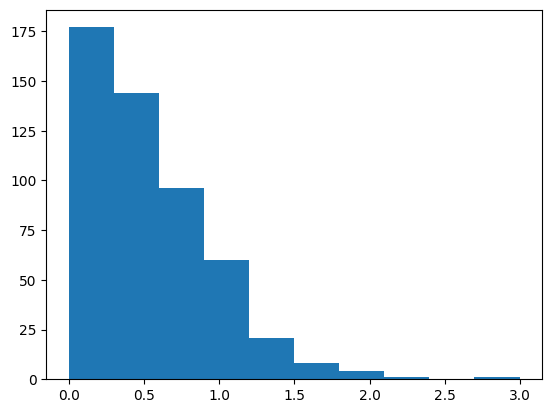

In [ ]:
from matplotlib import pyplot as plt 
plt.hist(d, bins=10)
plt.show()

Select 10 dimensions which have the smallest average value

In [ ]:
d.sort(reverse=True)
n = 10
bota = []
for i in d[-n:]:
    print(diff[i], i)
    bota.append(diff[i])

print(bota)

398 0.025686477000519403
108 0.02223245949481356
58 0.02086555790298178
493 0.017541259221018013
76 0.010225182224779306
48 0.008324337730369502
104 0.008230736441046105
188 0.008085063482702548
417 0.0070082186882451936
492 0.0002919015163883598
[398, 108, 58, 493, 76, 48, 104, 188, 417, 492]


Select 10 dimensions which have the largest average value

In [ ]:
n = 10
topa = []
for i in d[:n]:
    print(diff[i], i)
    topa.append(diff[i])

print(topa)

310 2.9963293898064656
84 2.1573068092291523
54 1.9738209859361957
371 1.924034569484256
278 1.8894716298979146
384 1.8166623717736319
250 1.6875573514893558
474 1.6517552590894786
311 1.5852355650975845
204 1.5683959337620477
[310, 84, 54, 371, 278, 384, 250, 474, 311, 204]


## Dimensions with intra class std

In [ ]:
# dimensions with intra class lowest std for singular noun
sg_adj_we.loc[:,:'511'].std().sort_values()[:10]

508    1.939596
229    2.185516
95     2.217793
186    2.227140
144    2.250810
491    2.263771
321    2.275298
219    2.301353
358    2.311036
158    2.314512
dtype: float64

In [ ]:

# dimensions with intra class highest std for singular noun
sg_adj_we.loc[:,:'511'].std().sort_values()[:-10:-1]

371    14.117612
52      3.843507
349     3.739209
361     3.711288
155     3.707703
212     3.703385
386     3.624813
221     3.621749
481     3.605137
dtype: float64

In [ ]:
# dimensions with intra class lowest std for plural noun
pl_adj_we.loc[:,:'511'].std().sort_values()[:10]

508    1.881600
229    2.035114
321    2.092419
360    2.156667
270    2.161883
186    2.170305
369    2.174213
25     2.185386
158    2.187741
127    2.188179
dtype: float64

In [ ]:

# dimensions with intra class highest std for plural noun
pl_adj_we.loc[:,:'511'].std().sort_values()[:-10:-1]

371    13.808288
212     3.896545
361     3.832074
481     3.689502
349     3.685723
456     3.633983
52      3.599217
386     3.592909
221     3.568215
dtype: float64

# Dimension both in lowest intra class std for singular and plural: 508,229,186,321,158


# Correlation 

# Correlation between dimentions with largest difference of sg_avg and pl_avg and Number



Test the correlation of "nb" with 10 dimensions of average which have the largest difference: [310, 84, 54, 371, 278, 384, 250, 474, 311, 204]

In [ ]:
all_adj_we["number"] = all_adj_we["number"].apply(lambda x: 1 if x == "singular" else 0)
number_corr_df = pd.DataFrame(columns=["correlation number"])
number_list = []

for i in range(512):
    number_list.append(all_adj_we.loc[:,[str(i), 'number']].corr().iloc[0][-1])

number_corr_df["correlation number"] = number_list
number_corr_df["sign"] = np.sign(number_corr_df["correlation number"])
number_corr_df["abs"] = abs(number_corr_df["correlation number"])

# Dimensions having the highest abs correlation with number
number_corr_df.sort_values("abs")[-10:][::-1]

,correlation number,sign,abs
310,0.410988,1.0,0.410988
54,0.399206,1.0,0.399206
192,-0.362905,-1.0,0.362905
384,-0.353143,-1.0,0.353143
274,0.350480,1.0,0.350480
84,-0.343129,-1.0,0.343129
56,-0.341046,-1.0,0.341046
318,-0.323895,-1.0,0.323895
285,0.316130,1.0,0.316130
25,-0.308397,-1.0,0.308397


In [ ]:

# Dimensions having the smallest abs correlation with number
number_corr_df.sort_values("abs")[:10][::-1]

,correlation number,sign,abs
330,0.001510,1.0,0.001510
487,0.001410,1.0,0.001410
363,0.001230,1.0,0.001230
99,0.001067,1.0,0.001067
437,-0.000921,-1.0,0.000921
35,0.000899,1.0,0.000899
2,0.000867,1.0,0.000867
459,-0.000721,-1.0,0.000721
465,0.000522,1.0,0.000522
141,0.000276,1.0,0.000276


Same observation like Noun:  Compared with 10 dimensions with largest difference of sg_avg and pl_avg, the correlation for dimension with lowest-std with Number are small.

# Hypothsis for Adj : 

The dimensions with largest correlation with nb: 310, 54, 192, 384,274, 84,56, 318,285,25, may encode information about Singular and Plural Nouns. 

The dimensions with lowest intra class std:  508, 229, 186, 321, 158  may  encode information about Singular and Plural Nouns.

# See in dimensions

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

Dimension with smallest abs correlation with number: 141, 465, 459,2,35

<Axes: xlabel='35', ylabel='Count'>

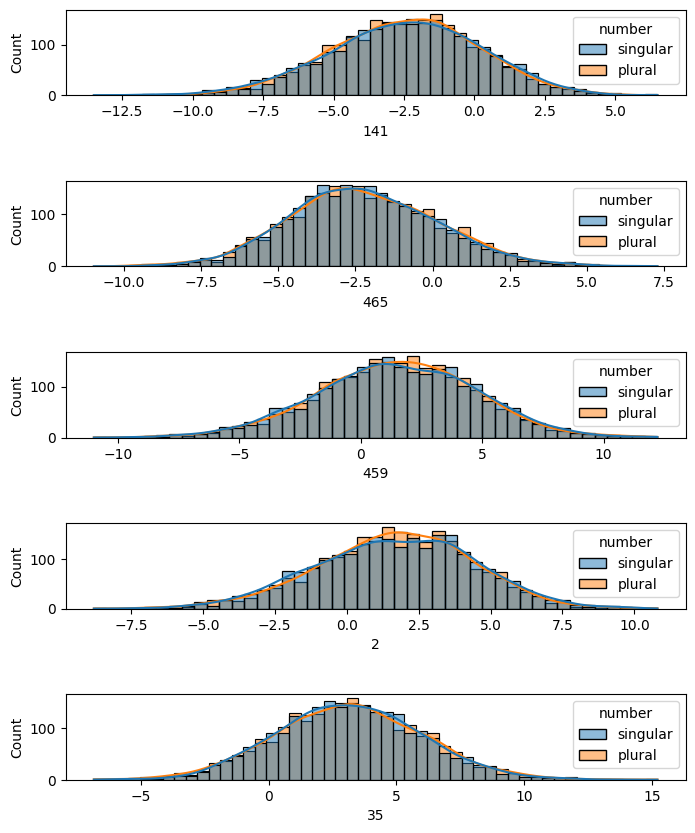

In [ ]:
# dimension 141, 465, 459,2,35
fig, axs = plt.subplots(5,1,figsize=(8,10))
fig.subplots_adjust(hspace=1)
sns.histplot(data=all_adj_we, x="141", hue="number", kde=True, ax=axs[0])
sns.histplot(data=all_adj_we, x="465", hue="number", kde=True, ax=axs[1])
sns.histplot(data=all_adj_we, x="459", hue="number", kde=True, ax=axs[2])
sns.histplot(data=all_adj_we, x="2", hue="number", kde=True, ax=axs[3])
sns.histplot(data=all_adj_we, x="35", hue="number", kde=True, ax=axs[4])

Dimension with largest  correlation with number:  310, 54, 192, 384,274, 84,56, 318,285,25

<Axes: xlabel='274', ylabel='Count'>

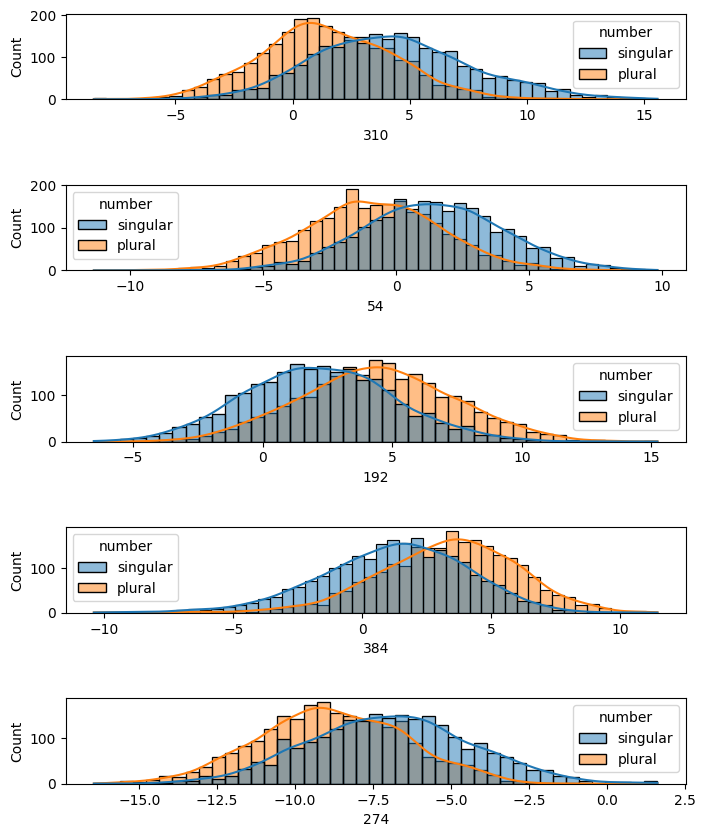

In [ ]:
# dimension  310, 54, 192, 384,274
fig, axs = plt.subplots(5,1,figsize=(8,10))
fig.subplots_adjust(hspace=1)
sns.histplot(data=all_adj_we, x="310", hue="number", kde=True, ax=axs[0])
sns.histplot(data=all_adj_we, x="54", hue="number", kde=True, ax=axs[1])
sns.histplot(data=all_adj_we, x="192", hue="number", kde=True, ax=axs[2])
sns.histplot(data=all_adj_we, x="384", hue="number", kde=True, ax=axs[3])
sns.histplot(data=all_adj_we, x="274", hue="number", kde=True, ax=axs[4])

<Axes: xlabel='25', ylabel='Count'>

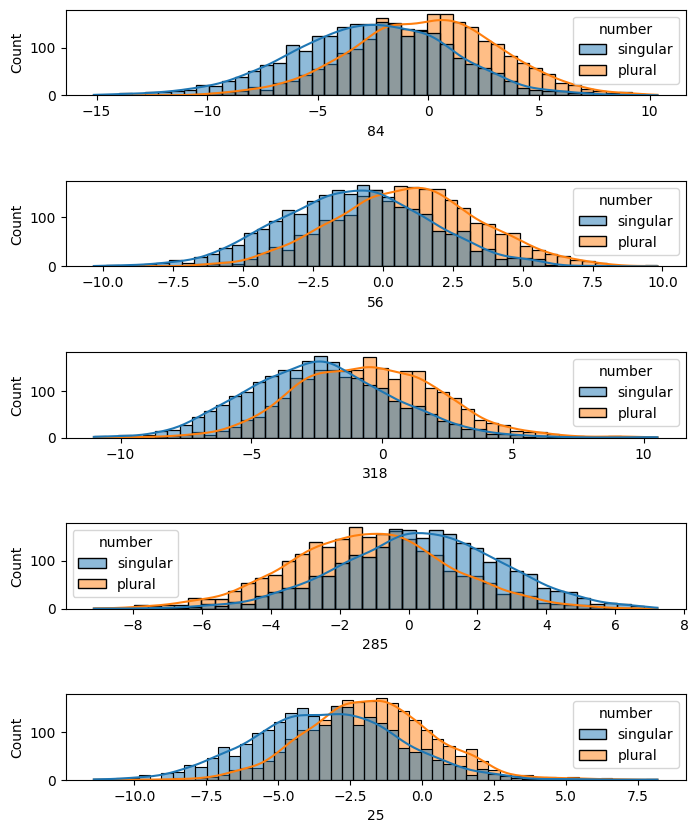

In [ ]:
# dimension 84,56, 318,285,25
fig, axs = plt.subplots(5,1,figsize=(8,10))
fig.subplots_adjust(hspace=1)
sns.histplot(data=all_adj_we, x="84", hue="number", kde=True, ax=axs[0])
sns.histplot(data=all_adj_we, x="56", hue="number", kde=True, ax=axs[1])
sns.histplot(data=all_adj_we, x="318", hue="number", kde=True, ax=axs[2])
sns.histplot(data=all_adj_we, x="285", hue="number", kde=True, ax=axs[3])
sns.histplot(data=all_adj_we, x="25", hue="number", kde=True, ax=axs[4])

dimension 310

In [ ]:
all_adj_we.loc[:, '310'].sort_values()[-30:]

Word
sautant          12.410545
dépassant        12.520103
réuni            12.585737
poussant         12.606229
fondant          12.782766
reconnaissant    12.785058
versant          12.913980
prenant          12.932544
adjoint          12.962178
menant           12.992452
déclaré          13.093824
renforçant       13.112268
rapporteur       13.217785
qualifiant       13.293533
expliqué         13.366589
donnant          13.409505
sentant          13.629903
fier             13.721806
souligné         13.876959
affirmant        13.883985
pre              13.943145
insistant        14.003570
délégué          14.005061
réunis           14.326883
plaidé           14.336613
exhorté          14.662769
affirmé          14.755736
rappelé          14.782022
insisté          14.927634
considérant      15.572866
Name: 310, dtype: float64

In [ ]:
all_adj_we.loc[:, '310'].sort_values()[:30]

Word
verbaux            -8.481278
sécurisés          -8.352981
connectés          -6.834867
lesdits            -6.231551
préférés           -6.203099
entrants           -6.157409
verticaux          -5.762584
transfrontaliers   -5.759041
oraux              -5.690227
manufacturier      -5.634793
émetteurs          -5.452539
natifs             -5.428175
masculins          -5.325269
reçus              -5.267054
favoris            -5.228978
connectées         -5.147152
soupçonnés         -5.082095
abonné             -4.980725
présumés           -4.961059
ledit              -4.863092
méditerranéens     -4.848748
surveillés         -4.823426
personnalisés      -4.800051
bilatéraux         -4.714468
homosexuels        -4.707140
urbains            -4.701503
acceptés           -4.700451
singuliers         -4.650249
sondés             -4.634388
cassés             -4.545551
Name: 310, dtype: float64

<Axes: xlabel='158', ylabel='Count'>

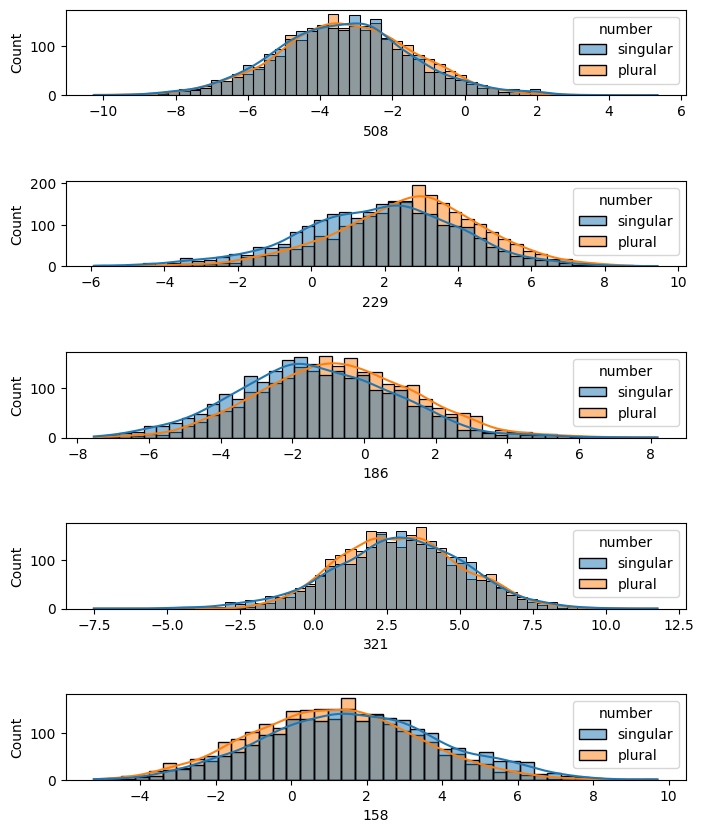

In [ ]:
# dimensions 508, 229, 186, 321, 158
fig, axs = plt.subplots(5,1,figsize=(8,10))
fig.subplots_adjust(hspace=1)
sns.histplot(data=all_adj_we, x="508", hue="number", kde=True, ax=axs[0])
sns.histplot(data=all_adj_we, x="229", hue="number", kde=True, ax=axs[1])
sns.histplot(data=all_adj_we, x="186", hue="number", kde=True, ax=axs[2])
sns.histplot(data=all_adj_we, x="321", hue="number", kde=True, ax=axs[3])
sns.histplot(data=all_adj_we, x="158", hue="number", kde=True, ax=axs[4])

dimension 508 

In [ ]:
all_adj_we.loc[:, '508'].sort_values()[-30:]

Word
visées             1.821162
parfait            1.837819
boulot             1.852101
ordonnées          1.867817
jolis              1.913098
brillant           1.924942
beaux              1.926020
triplé             1.944121
motivé             1.946719
verdoyant          1.965440
impressionnant     1.975667
votant             2.020872
tunisien           2.022128
postal             2.053815
réussies           2.056695
requérant          2.094569
exceptionnel       2.107281
délicat            2.196994
désert             2.210421
pre                2.259000
nuls               2.340243
dénommé            2.393937
raciales           2.455731
impressionnants    2.526540
excellents         2.894880
bon                2.905476
lité               3.053543
rêvé               3.595159
décimales          4.088821
joli               5.337860
Name: 508, dtype: float64

In [ ]:
all_adj_we.loc[:, '508'].sort_values()[:30]

Word
fréquentes     -10.266779
occasionnel    -10.260366
occasionnels   -10.127172
âgées           -9.579756
nourrissant     -9.362121
prochain        -9.266186
prudent         -9.202681
laitiers        -9.160424
prochains       -9.042215
ménagé          -8.711472
ménagers        -8.710815
commenté        -8.672902
amphibiens      -8.663136
diminuant       -8.629511
enclins         -8.610294
souffrant       -8.585026
âgés            -8.542974
irrité          -8.499909
sures           -8.444615
hydratant       -8.444390
traversant      -8.389578
opposé          -8.313535
mensuels        -8.305171
déplacé         -8.255568
intolérantes    -8.198101
incitant        -8.180058
fâché           -8.145447
nourris         -8.125520
avertis         -8.121766
praticien       -8.120721
Name: 508, dtype: float64

Same as the result of Noun: 

From the result above, it seems that the dimensions with largest correlation with number may encode information about Singular and Plural Adjs. 


The dimensions The dimensions both have lowest intra class std dont't encode information about Singular and Plural Adjs.

# ADJ AND NOUN

In [ ]:
all_n_a_we = pd.concat([all_n_we, all_adj_we])
all_n_a_we

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,number
Word,,,,,,,,,,,,,,,,,,,,,
abaisse,0.220459,-0.189521,0.045737,0.184745,-0.113193,-0.201980,-0.038133,-0.037266,0.206875,0.200998,...,0.185762,-0.084412,0.023871,-0.055451,-0.277580,-0.464167,-0.253915,-0.022740,-0.070034,singular
abandonnée,0.186562,0.064228,0.031170,-0.148425,0.006770,-0.348528,-0.188934,-0.008588,-0.178685,-0.003720,...,0.023211,-0.053564,-0.200903,-0.085702,-0.350187,-0.238260,-0.272035,0.201565,-0.026614,singular
abattue,0.260729,0.045850,0.101676,-0.003735,-0.015672,-0.270450,-0.062373,0.093018,0.103828,0.066570,...,0.038298,-0.067715,-0.088245,-0.194287,-0.442045,-0.418452,-0.183319,-0.049300,-0.010448,singular
abbaye,0.205826,-0.220998,0.102629,0.006474,0.243580,-0.295889,-0.203044,-0.141686,-0.081058,0.067040,...,-0.279662,0.199704,0.146500,-0.082077,-0.328128,-0.346909,0.176100,-0.140092,-0.219602,singular
abdominale,0.211081,-0.014000,0.243652,0.034007,0.018724,-0.200862,-0.119463,-0.374813,0.434171,0.271661,...,0.266714,-0.035179,-0.078115,-0.001600,-0.125316,-0.276568,-0.000295,0.198328,-0.191832,singular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
évacuées,2.428496,-0.268850,0.705120,0.757247,1.352492,-6.485026,-0.607937,2.585948,1.701278,1.655839,...,3.810213,-1.075711,0.929055,-5.869285,-6.880526,-7.316164,-3.808335,3.514288,0.573135,plural
évaluées,7.062747,1.136489,2.533260,4.726340,-0.326897,-4.866898,1.199269,3.696086,-0.338103,0.695347,...,7.453263,-1.729898,0.560532,-0.439838,-3.046515,-0.377664,-6.456064,4.441374,-2.876898,plural
éventuelles,-4.537793,-2.413064,-1.959062,0.323099,-0.666984,-3.476775,-0.984208,-4.031217,5.632687,-1.332556,...,0.554554,-2.601951,-5.630439,-0.060747,-0.138128,-6.807765,-2.607736,4.961835,-0.272189,plural


# Correlation

In [ ]:
all_n_a_we["number"] = all_n_a_we["number"].apply(lambda x: 1 if x == "singular" else 0)
number_corr_df = pd.DataFrame(columns=["correlation number"])
number_list = []

for i in range(512):
  number_list.append(all_n_a_we.loc[:,[str(i), 'number']].corr().iloc[0][-1])

number_corr_df["correlation number"] = number_list
number_corr_df["sign"] = np.sign(number_corr_df["correlation number"])
number_corr_df["abs"] = abs(number_corr_df["correlation number"])

# Dimensions having the highest abs correlation with gender
number_corr_df.sort_values("abs")[-10:][::-1]

,correlation number,sign,abs
54,0.248117,1.0,0.248117
310,0.217724,1.0,0.217724
56,-0.208077,-1.0,0.208077
285,0.199670,1.0,0.199670
84,-0.198117,-1.0,0.198117
81,-0.192110,-1.0,0.192110
384,-0.185196,-1.0,0.185196
311,0.181131,1.0,0.181131
318,-0.179938,-1.0,0.179938
474,-0.172698,-1.0,0.172698
